In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt

Using TensorFlow backend.


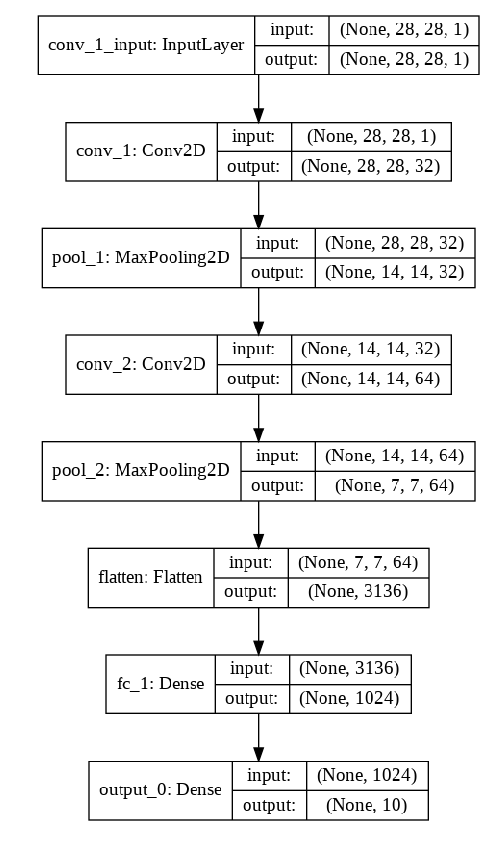

Epoch 1/10
60000/60000 [==============================] - 14s 228us/step - loss: 0.2765 - acc: 0.9238
Epoch 2/10
60000/60000 [==============================] - 13s 221us/step - loss: 0.0727 - acc: 0.9786
Epoch 3/10
60000/60000 [==============================] - 14s 226us/step - loss: 0.0502 - acc: 0.9851
Epoch 4/10
60000/60000 [==============================] - 13s 222us/step - loss: 0.0403 - acc: 0.9875
Epoch 5/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.0322 - acc: 0.9899
Epoch 6/10
60000/60000 [==============================] - 13s 210us/step - loss: 0.0268 - acc: 0.9919
Epoch 7/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.0233 - acc: 0.9922
Epoch 8/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.0182 - acc: 0.9941
Epoch 9/10
60000/60000 [==============================] - 13s 210us/step - loss: 0.0161 - acc: 0.9950
Epoch 10/10
10000/10000 [==============================] - 1s 106us/step
test loss

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape([-1,28,28,1])/255.0
x_test = x_test.reshape([-1,28,28,1])/255.0
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

model = Sequential()
model.add(Conv2D(input_shape=(28,28,1), filters=32, kernel_size=5, padding='same', activation='relu', name='conv_1'))
model.add(MaxPool2D(strides=2, padding='same', name='pool_1'))
model.add(Conv2D(64, 5, padding='same', activation='relu', name='conv_2'))
model.add(MaxPool2D(strides=2, padding='same', name='pool_2'))
model.add(Flatten(name='flatten'))
model.add(Dense(units=1024, activation='relu', name='fc_1'))
model.add(Dense(units=10, activation='softmax', name='output_0'))

adam = Adam(1e-4)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# 绘制网络结构图
plot_model(model, to_file='test1.png', show_shapes=True, show_layer_names=True, rankdir='TB')    # rankdir='LR':创造一个水平图，'TB'创造一个垂直图'
plt.figure(figsize=(15,15))
img = plt.imread('test1.png')
plt.imshow(img)
plt.axis('off')
plt.show()

model.fit(x_train, y_train, batch_size=64, epochs=10)
loss, acc = model.evaluate(x_test, y_test)
print('test loss is', loss, 'test accuracy is', acc)